In [2]:
import cv2 as cv
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Assignment 2: Pixel Processing, Color Spaces, Convolution

In this assignment, we were tasked with learning how to process and manipulate pixels of images to change brightness and contrast, and filter the images to blur/sharpen. To do this, we 

In [3]:
# Read the first three images
img1 = cv.imread("book.jpg")
img2 = cv.imread("pumpkin.jpg")
img3 = cv.imread("red_chair.jpg")

##### Pixel Processing
Change Brightness: Subtract from each pixel to decrease brightness or add to each pixel to increase brightness

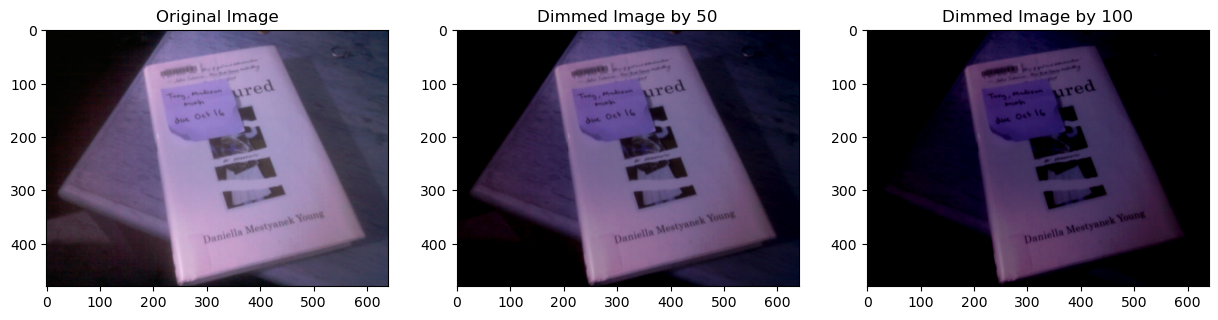

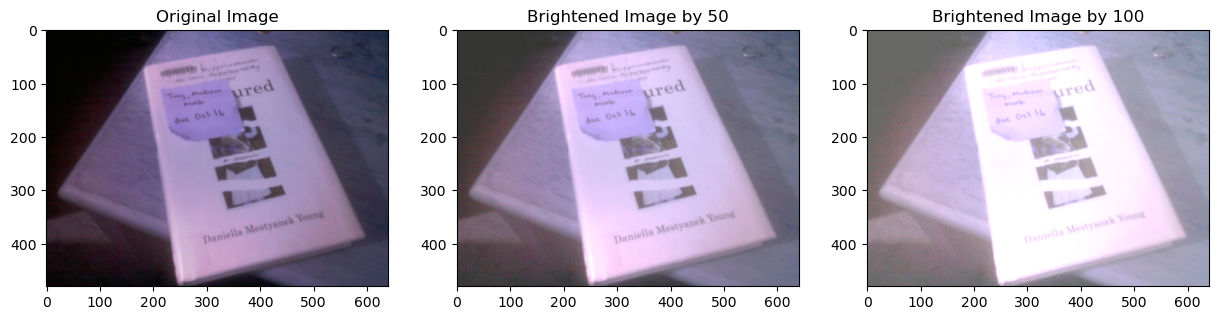

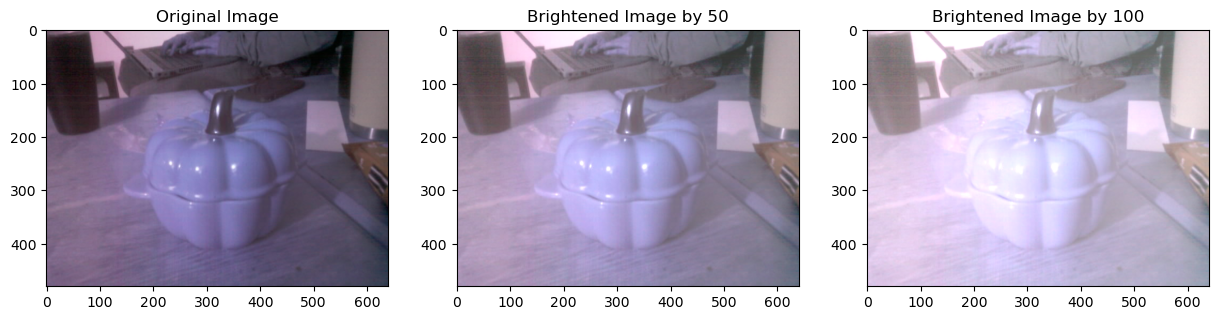

In [21]:
def change_brightness(img, change_type):
    '''
    Plots an original image, as well as two levels of brightness change.
    Args:
        img: An image as read in by the python opencv package.
        change_type: A string representing the type of brightness change: increase or decreased brightness.
    '''
    # establish brightness values and subplots 
    brightness_values = [50,100]
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[15,15])
    fig_num = [ax2, ax3]

    # plot the original image 
    ax1.imshow(img)

    # loop through the brightness range
    for i in range(len(brightness_values)):
        if change_type == 'increase':
            changed_image = img + brightness_values[i]
            changed_image[changed_image < img] = 255
        elif change_type == 'decrease':
            changed_image = img - brightness_values[i]
            changed_image[changed_image > img] = 0

        fig_num[i].imshow(changed_image)

    ax1.title.set_text('Original Image')    
    if change_type == 'increase':
        ax2.title.set_text('Brightened Image by 50')
        ax3.title.set_text('Brightened Image by 100')
    elif change_type == 'decrease':
        ax2.title.set_text('Dimmed Image by 50')
        ax3.title.set_text('Dimmed Image by 100')

change_brightness(img1, "decrease")
change_brightness(img1, "increase")
change_brightness(img2, 'increase')


Change contrast: Change contrast of image by multiplying or dividing by a factor 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


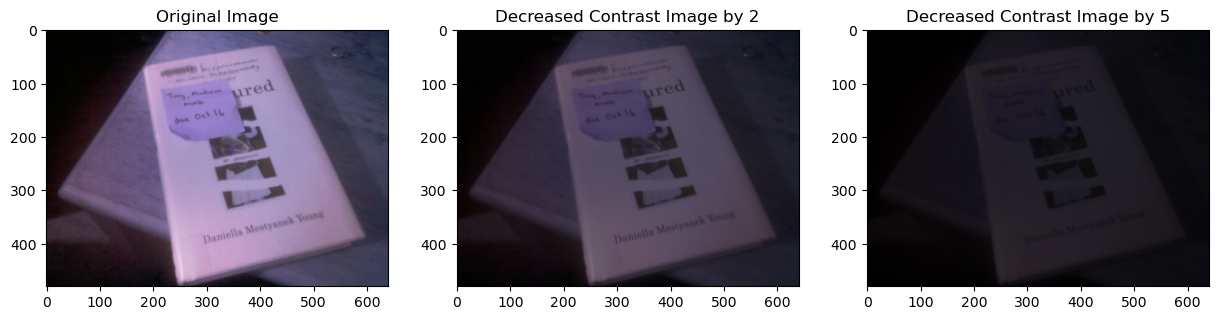

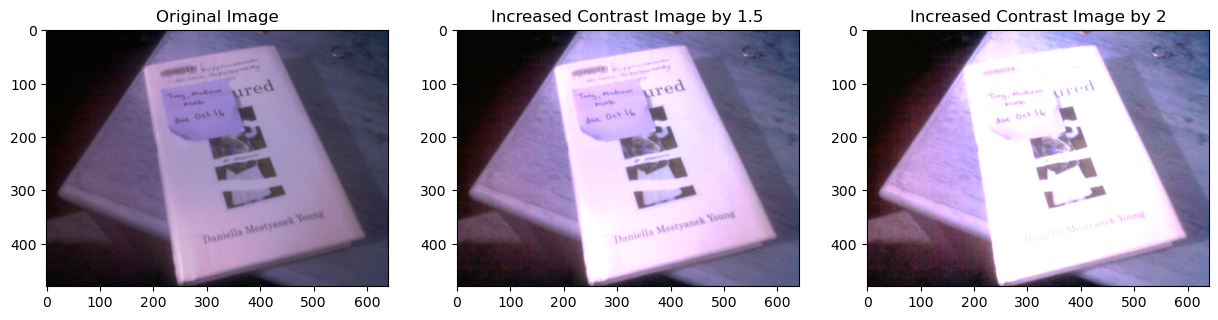

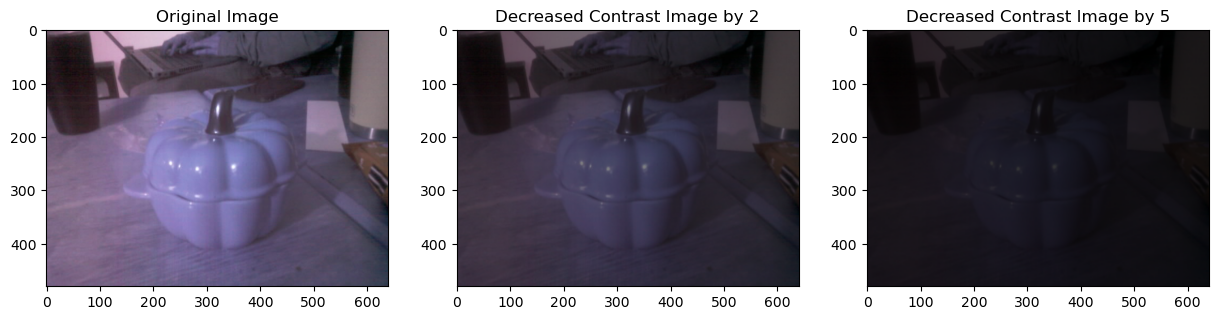

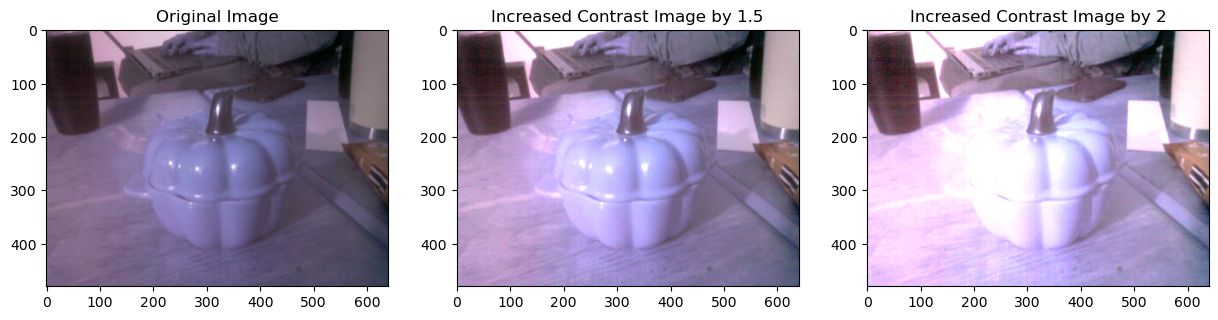

In [20]:
def change_contrast(img, change_type):
    ''''''
    contrast_values = [2,5]
    # if change_type == 'decrease':
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[15,15])
    fig_num = [ax2, ax3]

    # plot the original image 
    ax1.imshow(img)

    for i in range(len(contrast_values)):
        if change_type == 'increase':
            contrast_values = [1.5, 2]
            img_change = (img*contrast_values[i]).astype(np.int32)
            img_change[img_change < img] = 255

        if change_type == 'decrease':
            img_change = img // contrast_values[i]
            img_change[img_change > img] = 0
        
        fig_num[i].imshow(img_change)

    ax1.title.set_text('Original Image')    
    if change_type == 'increase':
        ax2.title.set_text('Increased Contrast Image by 1.5')
        ax3.title.set_text('Increased Contrast Image by 2')
    elif change_type == 'decrease':
        ax2.title.set_text('Decreased Contrast Image by 2')
        ax3.title.set_text('Decreased Contrast Image by 5')
    
change_contrast(img1, 'decrease')
change_contrast(img1, 'increase')
change_contrast(img2, 'decrease')
change_contrast(img2, 'increase')


Change brightness alternating: alternate brightness of pixels 

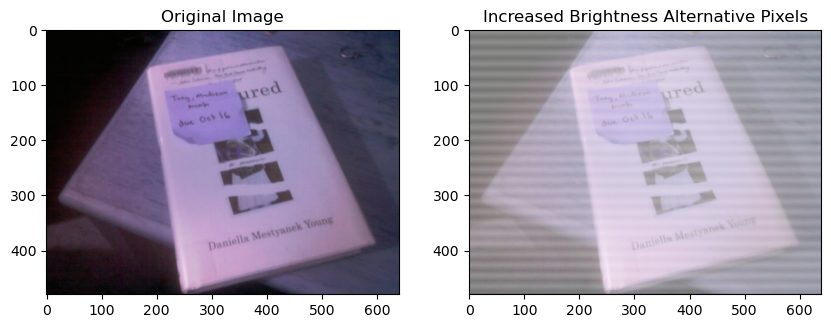

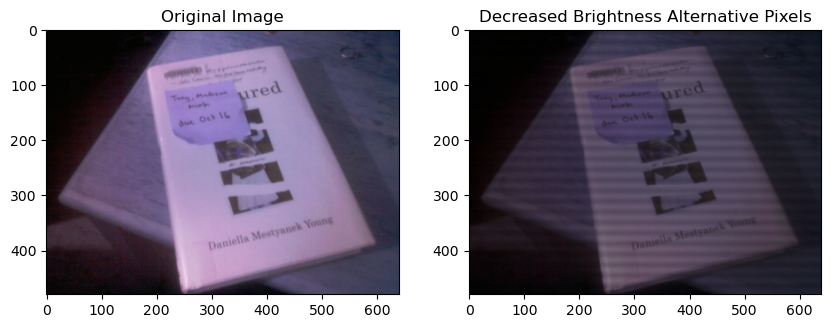

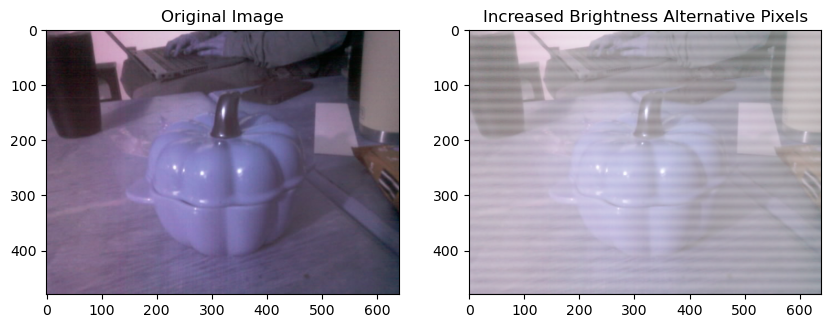

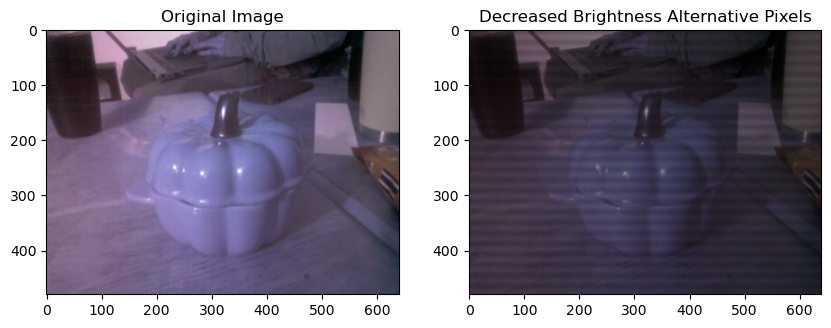

In [25]:
def alternating_brightness_change(img, change_type):
    '''
    Plots a figure containing the original image given and a version of the image with the
    alternating pixels brightened or dimmed, depending on the change sepcified.
    Args:
        img: An image read in using opencv python package. 
        change_type: A string representing the type of change to brightness to apply.
    '''
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=[10,10])

    ax1.imshow(img)
    ax1.title.set_text('Original Image')
    img_change = np.copy(img)

    if change_type == 'increase':
        img_change[::2] = 255
        ax2.title.set_text('Increased Brightness Alternating Pixels')
    elif change_type == 'decrease':
        img_change[::2] = 0
        ax2.title.set_text('Decreased Brightness Alternating Pixels')

    ax2.imshow(img_change)

alternating_brightness_change(img1, 'increase')
alternating_brightness_change(img1, 'decrease') 
alternating_brightness_change(img2, 'increase')
alternating_brightness_change(img2, 'decrease')

##### Color Spaces

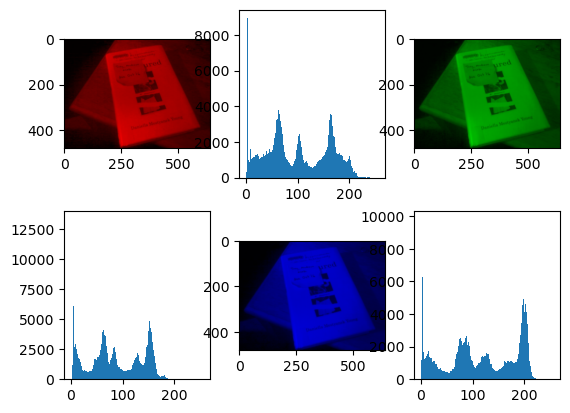

In [29]:
def plot_histogram(data, colorscale, plt):
    '''
    Plots a histogram of an image given an array of integers representing the pixel
    color, and the max value of the colorgrade scale.

    Args:
        data: An array of integers representing each pixel's color value in the photo.
        colorscale: An integer representing the max value of the color scale.
    '''
    return plt.hist(data, colorscale, [0, colorscale])

def change_color_rgb(img):
    (r, g, b) = cv.split(img)
    zeros = np.zeros(img.shape[:2], dtype=b.dtype)

    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)


    ax1.imshow(cv.merge([r, zeros, zeros]))
    plot_histogram(r.ravel(), 256, ax2)
    ax3.imshow(cv.merge([zeros, g, zeros]))
    plot_histogram(g.ravel(), 256, ax4)
    ax5.imshow(cv.merge([zeros, zeros, b]))
    plot_histogram(b.ravel(), 256, ax6)

change_color_rgb(img1)

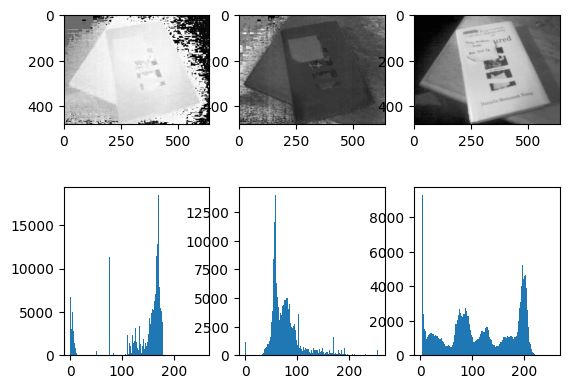

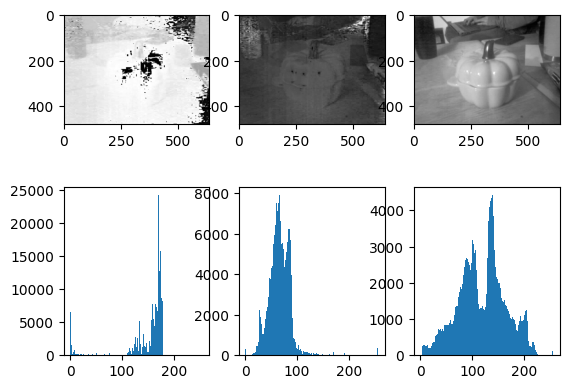

In [60]:
def change_color_hsv(img):
    (h, s, v) = cv.split(cv.cvtColor(img, cv.COLOR_BGR2HSV))
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
    ax1.imshow(h, "gray")
    plot_histogram(h.ravel(), 256, ax4)
    ax2.imshow(s, "gray")
    plot_histogram(s.ravel(), 256, ax5)
    ax3.imshow(v, "gray")
    plot_histogram(v.ravel(), 256, ax6)

change_color_hsv(img1)
change_color_hsv(img2)


Description / analysis of this

##### Convolution / Filtering

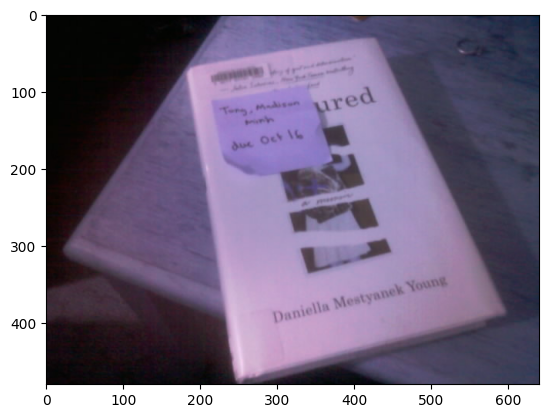

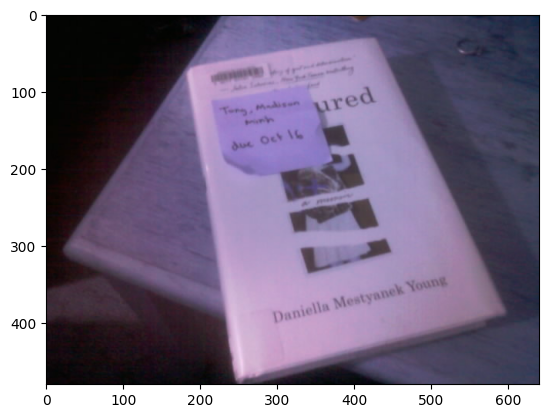

In [65]:
def identity_filter(img):
    filter = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
    identity_img = cv.filter2D(src=img, ddepth=-1, kernel=filter)
    plt.imshow(identity_img)
    plt.show()

plt.imshow(img1)
plt.show()
identity_filter(img1)

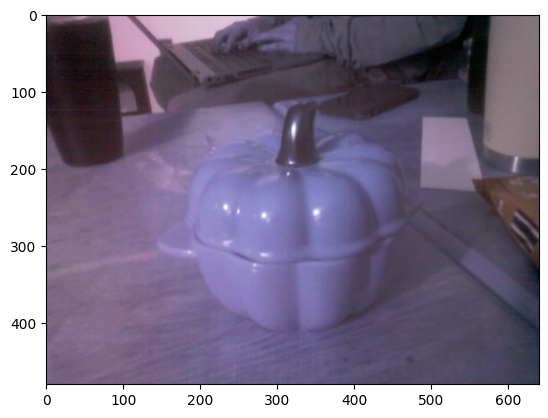

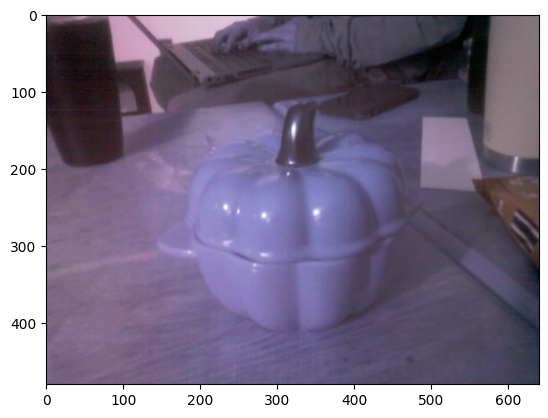

In [67]:
plt.imshow(img2)
plt.show()
identity_filter(img2)

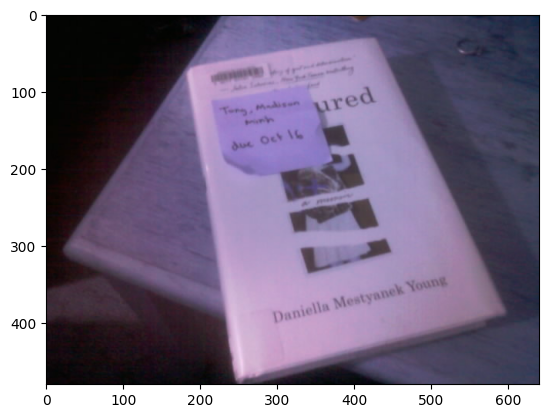

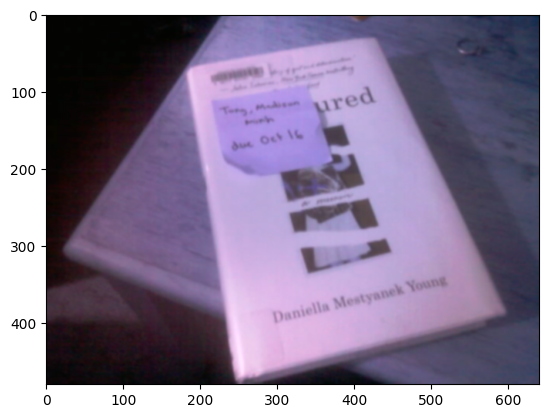

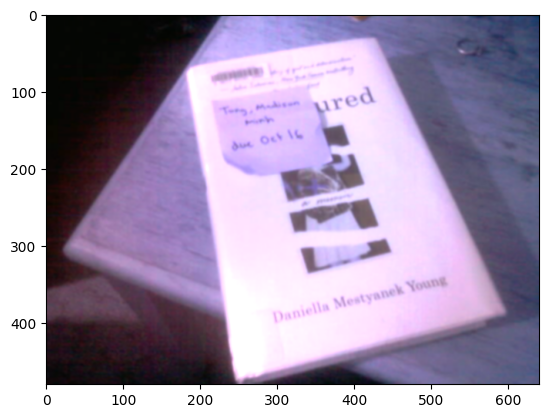

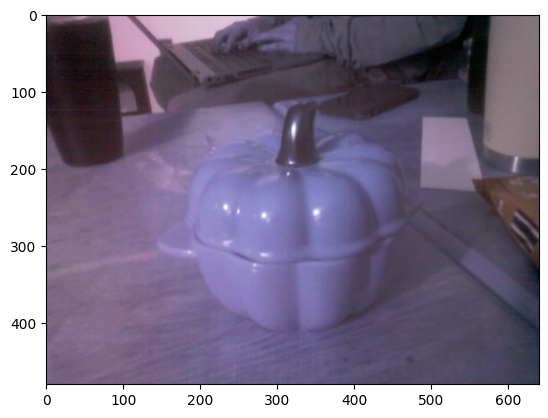

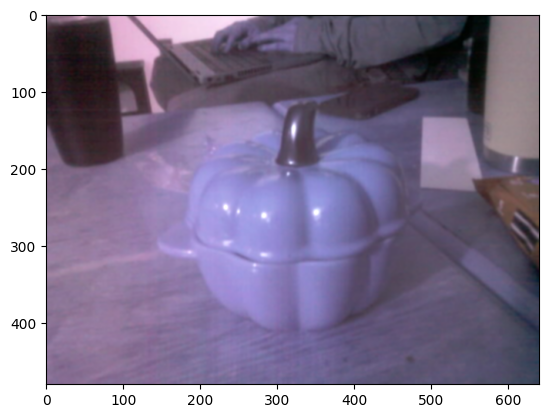

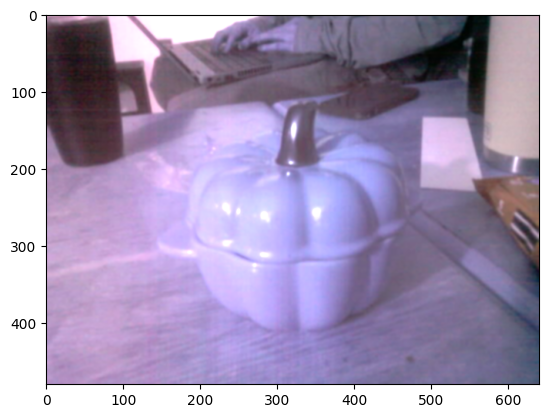

In [76]:
def box_filter(img):
    filter1 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) * 1/8
    filter2 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) * 1/6
    # filter2 = np.array([[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]])
    box_img1 = cv.filter2D(src=img, ddepth=-1, kernel=filter1)
    box_img2 = cv.filter2D(src=img, ddepth=-1, kernel=filter2)

    plt.imshow(box_img1)
    plt.show()

    plt.imshow(box_img2)
    plt.show()

plt.imshow(img1)
plt.show()
box_filter(img1)

plt.imshow(img2)
plt.show()
box_filter(img2)

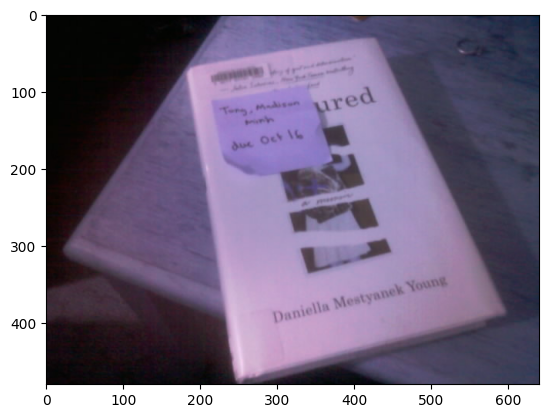

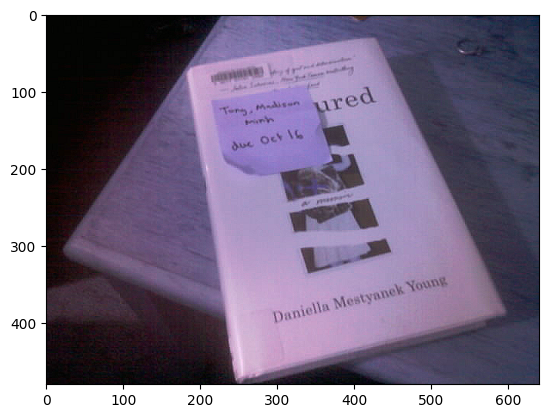

In [82]:
def sharpening_filter(img):
    filter1 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharp_img1 = cv.filter2D(src=img, ddepth=-1, kernel=filter1)

    plt.imshow(sharp_img1)
    plt.show()

plt.imshow(img1)
plt.show()
sharpening_filter(img1)

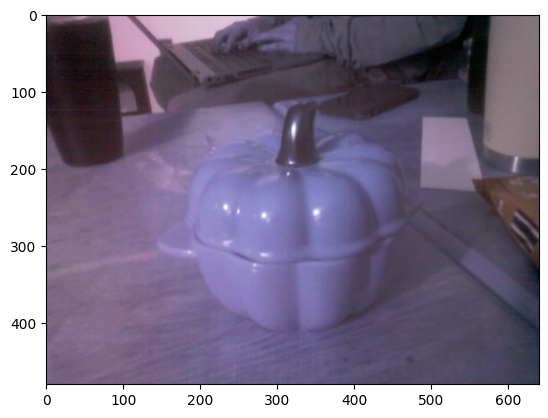

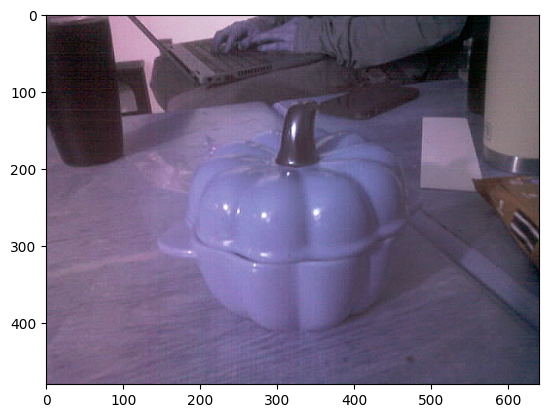

In [84]:
plt.imshow(img2)
plt.show()
sharpening_filter(img2)

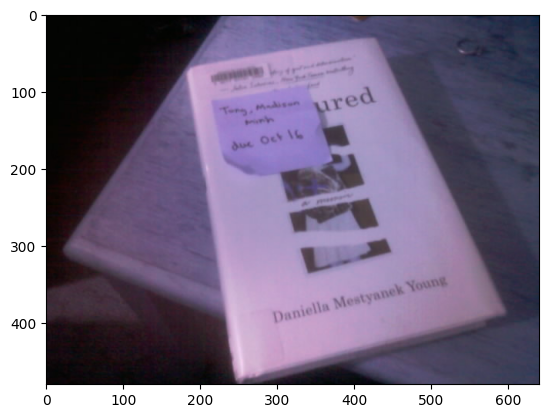

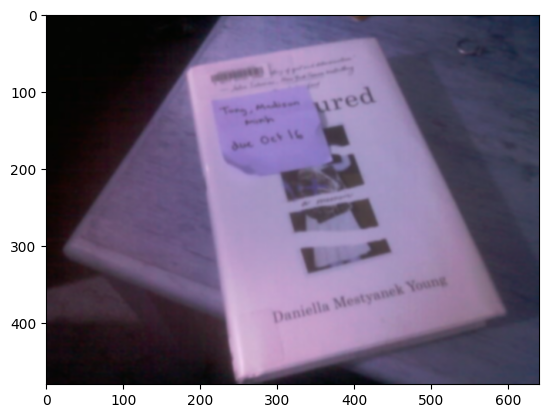

In [89]:
def gaussian_filter(img):
    filter = np.array([[-1, -1, -1], [-1, 10, -1], [-1, -1, -1]])
    new_img = cv.GaussianBlur(img, (5, 5), 0)

    plt.imshow(new_img)
    plt.show()

plt.imshow(img1)
plt.show()
gaussian_filter(img1)

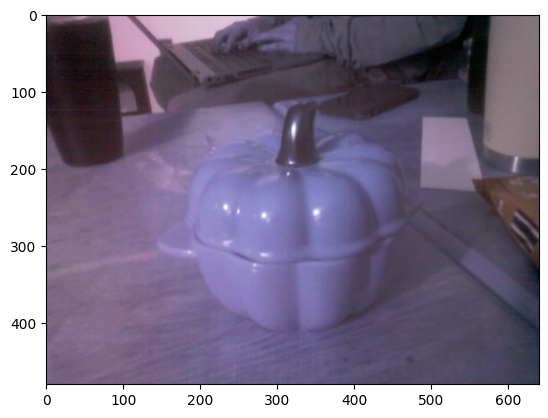

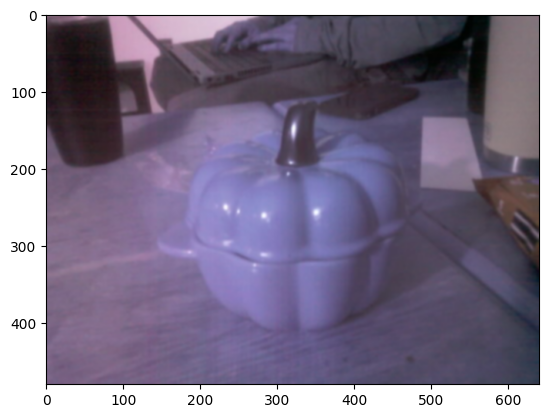

In [92]:
plt.imshow(img2)
plt.show()
gaussian_filter(img2)